# Import the dependencies

In [7]:
import torch
import torchvision
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Loading the model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\harsh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-27 Python-3.9.5 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Make detections

In [4]:
img = "https://ultralytics.com/images/zidane.jpg"


In [5]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 680.9ms pre-process, 114.7ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


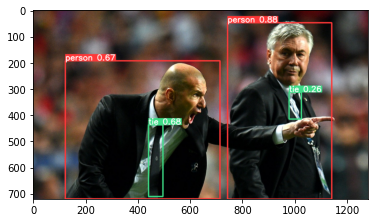

In [6]:
%matplotlib inline

plt.imshow(np.squeeze(results.render()))

# Accessing web-cam and doing real-time detection

In [9]:
cap = cv2.VideoCapture(0)
# winname = "aaaaa"


# the while condition checks whether the cam is open or not
while cap.isOpened():
    ret, frame = cap.read()
    
    
    # making detections
    results = model(frame)
#     cv2.namedWindow(winname)
#     cv2.moveWindow(winname, 40,30)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Train from scratch

In [8]:
import uuid
import os
import time

In [35]:
IMAGES_PATH = os.path.join('data', 'images')

labels = ['awake', 'drowsy']
number_imgs = 20

IMAGES_PATH

'data\\images'

### Gathering our own data

In [ ]:
cap = cv2.VideoCapture(0)

# loop through label
for label in labels:
    print(f"Collecting data for {label}")
    time.sleep(5)
    
    #loop through image range
    
    for image_number in range(number_imgs):
        print(f"Collecting images for {label} and image number {image_number}")
        
        # webcam feed
        ret, frame = cap.read()
        
        # naming out image path
        img_name = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid4()) + '.jpg')
        
        # writes out image to file
        cv2.imwrite(img_name, frame)
        
        # render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second buffer or delay to move between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

# Installing labelimg to label images into 'awake' and 'drowsy' class 

In [10]:
!git clone https://github.com/heartexlabs/labelImg.git

Cloning into 'labelImg'...


In [11]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

You should consider upgrading via the 'C:\Users\harsh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [12]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt # install dependencies


import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

[WinError 2] The system cannot find the file specified: 'yolov5'
C:\Users\harsh\OneDrive\Desktop\Coding\Drowsiness-Detection


fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'
You should consider upgrading via the 'C:\Users\harsh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.
Setup complete. Using torch 1.12.1+cpu (CPU)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\harsh\\AppData\\Local\\Temp\\pip-uninstall-421_fhgs\\kiwisolver.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\harsh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 3 --data dataset.yaml --weights yolov5s.pt

C:\Users\harsh\OneDrive\Desktop\Coding\Drowsiness-Detection\yolov5
^C


In [1]:
%cd C:\Users\harsh\OneDrive\Desktop\Coding\Drowsiness-Detection

C:\Users\harsh\OneDrive\Desktop\Coding\Drowsiness-Detection


In [4]:
# %cd yolov5
!python train.py --img 640 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.2-61-gffbce38 Python-3.9.5 torch-1.12.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, s


  0%|          | 0/3 [00:00<?, ?it/s]
      41/49         0G     0.0281    0.01546    0.02065         37        640:   0%|          | 0/3 [00:08<?, ?it/s]
      41/49         0G     0.0281    0.01546    0.02065         37        640:  33%|###3      | 1/3 [00:08<00:16,  8.43s/it]
      41/49         0G    0.03436    0.01673     0.0262         45        640:  33%|###3      | 1/3 [00:16<00:16,  8.43s/it]
      41/49         0G    0.03436    0.01673     0.0262         45        640:  67%|######6   | 2/3 [00:16<00:08,  8.20s/it]
      41/49         0G    0.03759    0.01763    0.02532         22        640:  67%|######6   | 2/3 [00:20<00:08,  8.20s/it]
      41/49         0G    0.03759    0.01763    0.02532         22        640: 100%|##########| 3/3 [00:20<00:00,  6.33s/it]
      41/49         0G    0.03759    0.01763    0.02532         22        640: 100%|##########| 3/3 [00:20<00:00,  6.86s/it]

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:   0

# Loading the model

In [ ]:
%cd ..

In [32]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp3/weights/last.pt', force_reload = True)

# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\harsh/.cache\torch\hub\master.zip
YOLOv5  2022-8-28 Python-3.9.5 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [36]:
img = os.path.join('data', 'images', 'awake.2cd61f37-b871-4f15-b10d-d9e0039eafe9.jpg')

image 1/1: 480x640 1 drowsy
Speed: 5.0ms pre-process, 117.7ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


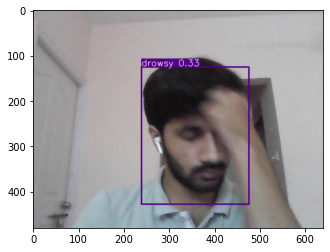

In [38]:
%matplotlib inline

results = model(img)
results.print()

plt.imshow(np.squeeze(results.render()))

In [ ]:
cap = cv2.VideoCapture(0)
# winname = "aaaaa"


# the while condition checks whether the cam is open or not
while cap.isOpened():
    ret, frame = cap.read()
    
    
    # making detections
    results = model(frame)
#     cv2.namedWindow(winname)
#     cv2.moveWindow(winname, 40,30)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()